In [66]:
import awkward as ak
import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

# we suppress ROOT warnings where our input ROOT tree has duplicate branches - these are handled correctly.
import warnings
warnings.filterwarnings("ignore", message="Found duplicate branch ")

In [67]:
# you can load the output!
import pickle
with open('out_Nov10.hist', 'rb') as f:
    out = pickle.load(f)

In [68]:
out[2017]["GluGluHToWWToLNuQQ_M125_TuneCP5_PSweight_13TeV-powheg2-jhugen727-pythia8"]["skimmed_events"]["ele"]["fj_pt"][out[2017]["GluGluHToWWToLNuQQ_M125_TuneCP5_PSweight_13TeV-powheg2-jhugen727-pythia8"]["skimmed_events"]["ele"]["fj_pt"] >0]

array([203.875, 209.25 , 276.25 , ..., 244.75 , 270.   , 308.5  ])

# Plotting histograms

In [69]:
skimmed_events_mu = out[2017]["GluGluHToWWToLNuQQ_M125_TuneCP5_PSweight_13TeV-powheg2-jhugen727-pythia8"]["skimmed_events"]["mu"]
skimmed_events_mu.keys()

dict_keys(['HLT_munominal', 'HLT_muvvl', 'HLT_muvvlmet', 'HLT_jet', 'fj_pt', 'fj_msoftdrop', 'lep_pt', 'lep_isolation', 'fj_lep_mass', 'fj_lep_dR', 'ht', 'higgspt', 'higgspt_unmatched', 'iswlepton', 'iswstarlepton'])

### Plotting: higgspt, jetpt, leptonpt

In [70]:
# now we can make histograms for higgspt, jetpt, leptonpt
import hist as hist2
region_cat = hist2.axis.StrCategory(["numerator","denominator"], name="region")
channel_cat = hist2.axis.StrCategory([], name='channel', growth=True)
trigger_cat = hist2.axis.StrCategory([], name='trigger', growth=True)

hpt_axis = hist2.axis.Regular(25, 100, 700, name='higgspt', label=r'matched H $p_T$ [GeV]')
jetpt_axis = hist2.axis.Regular(25, 200, 700, name='jetpt', label=r'Jet $p_T$ [GeV]')
leppt_axis = hist2.axis.Regular(25, 10, 400, name='leppt', label=r'Lepton $p_T$ [GeV]')

hists = {}
hists["jet"] = hist2.Hist(
                channel_cat,
                region_cat,
                trigger_cat,
                hpt_axis,
                jetpt_axis,
                leppt_axis,
            )
# now we can fill the histogram with the denominator (baseline selection already applied)
higgspt = skimmed_events_mu["higgspt"]
jetpt = skimmed_events_mu["fj_pt"]
leppt = skimmed_events_mu["lep_pt"]

hists["jet"].fill(
    channel="mu",
    region="denominator",
    trigger="all",
    higgspt=higgspt,
    jetpt=jetpt,
    leppt=leppt,
)
hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="nominal",
    higgspt=higgspt[skimmed_events_mu["HLT_munominal"]],
    jetpt=jetpt[skimmed_events_mu["HLT_munominal"]],
    leppt=leppt[skimmed_events_mu["HLT_munominal"]],

)
hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="vvl",
    higgspt=higgspt[skimmed_events_mu["HLT_muvvl"]],
    jetpt=jetpt[skimmed_events_mu["HLT_muvvl"]],
    leppt=leppt[skimmed_events_mu["HLT_muvvl"]], 
)

hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="met",
    higgspt=higgspt[skimmed_events_mu["HLT_muvvlmet"]],
    jetpt=jetpt[skimmed_events_mu["HLT_muvvlmet"]],
    leppt=leppt[skimmed_events_mu["HLT_muvvlmet"]],   
)

hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="jet",
    higgspt=higgspt[skimmed_events_mu["HLT_jet"]],
    jetpt=jetpt[skimmed_events_mu["HLT_jet"]],
    leppt=leppt[skimmed_events_mu["HLT_jet"]],   
)

hists["jet"]

Hist(
  StrCategory(['mu'], growth=True, name='channel', label='channel'),
  StrCategory(['numerator', 'denominator'], name='region', label='region'),
  StrCategory(['all', 'nominal', 'vvl', 'met', 'jet'], growth=True, name='trigger', label='trigger'),
  Regular(25, 100, 700, name='higgspt', label='matched H $p_T$ [GeV]'),
  Regular(25, 200, 700, name='jetpt', label='Jet $p_T$ [GeV]'),
  Regular(25, 10, 400, name='leppt', label='Lepton $p_T$ [GeV]'),
  storage=Double()) # Sum: 47673.0 (87063.0 with flow)

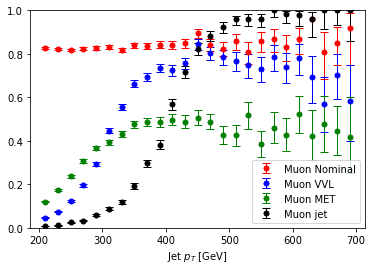

In [71]:
# now we plot trigger efficiency as function of jetpt
num_nom = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal", 'leppt':sum, 'higgspt':sum}]
num_vvl = hists["jet"][{"region":"numerator","channel":"mu","trigger":"vvl", 'leppt':sum, 'higgspt':sum}]
num_met = hists["jet"][{"region":"numerator","channel":"mu","trigger":"met", 'leppt':sum, 'higgspt':sum}]
num_jet = hists["jet"][{"region":"numerator","channel":"mu","trigger":"jet", 'leppt':sum, 'higgspt':sum}]

# den = hists["jet"][{"region":"denominator","channel":"mu","trigger":"all", 'leppt':sum, 'higgspt':sum}]    ### same thing
den = hists["jet"][{"region":"denominator","channel":"mu","trigger":sum, 'leppt':sum, 'higgspt':sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nom/den, 
             yerr=get_yerr(num_nom,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Muon Nominal",         
)
hep.histplot(num_vvl/den, 
             yerr=get_yerr(num_vvl,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Muon VVL",         
)
hep.histplot(num_met/den, 
             yerr=get_yerr(num_met,den),
             ax = ax,
             histtype='errorbar', color='green', capsize=4, elinewidth=1, label="Muon MET",         
)
hep.histplot(num_jet/den, 
             yerr=get_yerr(num_jet,den),
             ax = ax,
             histtype='errorbar', color='black', capsize=4, elinewidth=1, label="Muon jet",         
)
ax.set_ylim(0,1)
ax.legend()
plt.savefig('plots/mu_triggers/jetpt.pdf');

/tmp/ipykernel_121/3839912327.py:13: RuntimeWarning: invalid value encountered in true_divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())
/tmp/ipykernel_121/3839912327.py:13: RuntimeWarning: invalid value encountered in true_divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())
/tmp/ipykernel_121/3839912327.py:13: RuntimeWarning: invalid value encountered in true_divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())
/tmp/ipykernel_121/3839912327.py:13: RuntimeWarning: invalid value encountered in true_divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())


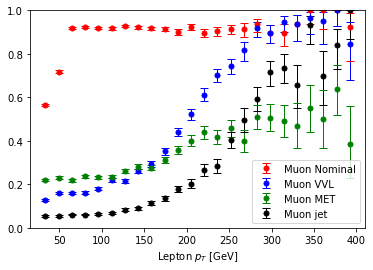

In [72]:
# now we plot trigger efficiency as function of leptonpt
num_nom = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal", 'jetpt':sum, 'higgspt':sum}]
num_vvl = hists["jet"][{"region":"numerator","channel":"mu","trigger":"vvl", 'jetpt':sum, 'higgspt':sum}]
num_met = hists["jet"][{"region":"numerator","channel":"mu","trigger":"met", 'jetpt':sum, 'higgspt':sum}]
num_jet = hists["jet"][{"region":"numerator","channel":"mu","trigger":"jet", 'jetpt':sum, 'higgspt':sum}]

den = hists["jet"][{"region":"denominator","channel":"mu","trigger":sum, 'jetpt':sum, 'higgspt':sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nom/den, 
             yerr=get_yerr(num_nom,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Muon Nominal",         
)
hep.histplot(num_vvl/den, 
             yerr=get_yerr(num_vvl,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Muon VVL",         
)
hep.histplot(num_met/den, 
             yerr=get_yerr(num_met,den),
             ax = ax,
             histtype='errorbar', color='green', capsize=4, elinewidth=1, label="Muon MET",         
)
hep.histplot(num_jet/den, 
             yerr=get_yerr(num_jet,den),
             ax = ax,
             histtype='errorbar', color='black', capsize=4, elinewidth=1, label="Muon jet",         
)
ax.set_ylim(0,1)
ax.legend()
plt.savefig('plots/mu_triggers/leppt.pdf');

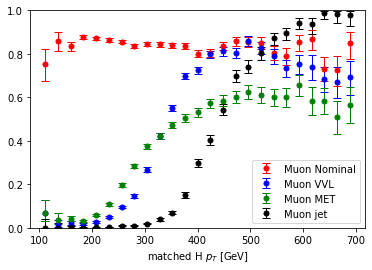

In [73]:
# now we plot trigger efficiency as function of higgspt
num_nom = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal", 'jetpt':sum, 'leppt':sum}]
num_vvl = hists["jet"][{"region":"numerator","channel":"mu","trigger":"vvl", 'jetpt':sum, 'leppt':sum}]
num_met = hists["jet"][{"region":"numerator","channel":"mu","trigger":"met", 'jetpt':sum, 'leppt':sum}]
num_jet = hists["jet"][{"region":"numerator","channel":"mu","trigger":"jet", 'jetpt':sum, 'leppt':sum}]

den = hists["jet"][{"region":"denominator","channel":"mu","trigger":sum, 'jetpt':sum, 'leppt':sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nom/den, 
             yerr=get_yerr(num_nom,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Muon Nominal",         
)
hep.histplot(num_vvl/den, 
             yerr=get_yerr(num_vvl,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Muon VVL",         
)
hep.histplot(num_met/den, 
             yerr=get_yerr(num_met,den),
             ax = ax,
             histtype='errorbar', color='green', capsize=4, elinewidth=1, label="Muon MET",         
)
hep.histplot(num_jet/den, 
             yerr=get_yerr(num_jet,den),
             ax = ax,
             histtype='errorbar', color='black', capsize=4, elinewidth=1, label="Muon jet",         
)
ax.set_ylim(0,1)
ax.legend()
plt.savefig('plots/mu_triggers/higgspt.pdf');

### Plotting: deltaR, HT

In [74]:
# now we can make histograms for deltaR and HT
import hist as hist2
region_cat = hist2.axis.StrCategory(["numerator","denominator"], name="region")
channel_cat = hist2.axis.StrCategory([], name='channel', growth=True)
trigger_cat = hist2.axis.StrCategory([], name='trigger', growth=True)

deltaR_axis = hist2.axis.Regular(20, 0, 1.5, name='deltaR', label=r'deltaR')
ht_axis = hist2.axis.Regular(20,180, 1500, name='ht', label=r'HT [GeV]')

hists = {}
hists["jet"] = hist2.Hist(
                channel_cat,
                region_cat,
                trigger_cat,
                deltaR_axis,
                ht_axis,
            )
# now we can fill the histogram with the denominator (baseline selection already applied)
deltaR = skimmed_events_mu["fj_lep_dR"]
ht = skimmed_events_mu["ht"]

hists["jet"].fill(
    channel="mu",
    region="denominator",
    trigger="all",
    deltaR=deltaR,
    ht=ht
)
hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="nominal",
    deltaR=deltaR[skimmed_events_mu["HLT_munominal"]],
    ht=ht[skimmed_events_mu["HLT_munominal"]],

)
hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="vvl",
    deltaR=deltaR[skimmed_events_mu["HLT_muvvl"]],    
    ht=ht[skimmed_events_mu["HLT_muvvl"]],    
)

hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="met",
    deltaR=deltaR[skimmed_events_mu["HLT_muvvlmet"]],    
    ht=ht[skimmed_events_mu["HLT_muvvlmet"]],    
)
hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="jet",
    deltaR=deltaR[skimmed_events_mu["HLT_jet"]],    
    ht=ht[skimmed_events_mu["HLT_jet"]],    
)

hists["jet"]

Hist(
  StrCategory(['mu'], growth=True, name='channel', label='channel'),
  StrCategory(['numerator', 'denominator'], name='region', label='region'),
  StrCategory(['all', 'nominal', 'vvl', 'met', 'jet'], growth=True, name='trigger', label='trigger'),
  Regular(20, 0, 1.5, name='deltaR', label='deltaR'),
  Regular(20, 180, 1500, name='ht', label='HT [GeV]'),
  storage=Double()) # Sum: 48498.0 (87063.0 with flow)

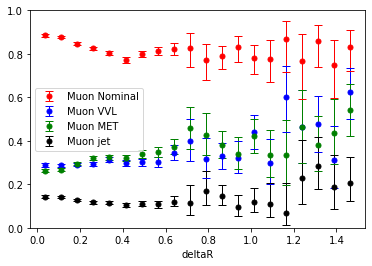

In [75]:
# now we plot trigger efficiency as function of deltaR

num_nom = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal", 'ht':sum}]
num_vvl = hists["jet"][{"region":"numerator","channel":"mu","trigger":"vvl", 'ht':sum}]
num_met = hists["jet"][{"region":"numerator","channel":"mu","trigger":"met", 'ht':sum}]
num_jet = hists["jet"][{"region":"numerator","channel":"mu","trigger":"jet", 'ht':sum}]

den = hists["jet"][{"region":"denominator","channel":"mu","trigger":sum, 'ht':sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nom/den, 
             yerr=get_yerr(num_nom,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Muon Nominal",         
)
hep.histplot(num_vvl/den, 
             yerr=get_yerr(num_vvl,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Muon VVL",         
)
hep.histplot(num_met/den, 
             yerr=get_yerr(num_met,den),
             ax = ax,
             histtype='errorbar', color='green', capsize=4, elinewidth=1, label="Muon MET",         
)
hep.histplot(num_jet/den, 
             yerr=get_yerr(num_jet,den),
             ax = ax,
             histtype='errorbar', color='black', capsize=4, elinewidth=1, label="Muon jet",         
)
ax.set_ylim(0,1)
ax.legend()
plt.savefig('plots/mu_triggers/deltaR.pdf');

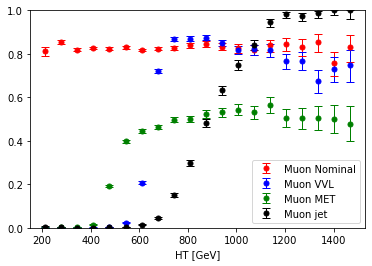

In [76]:
# now we plot trigger efficiency as function of ht
num_nom = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal", 'deltaR':sum}]
num_vvl = hists["jet"][{"region":"numerator","channel":"mu","trigger":"vvl", 'deltaR':sum}]
num_met = hists["jet"][{"region":"numerator","channel":"mu","trigger":"met", 'deltaR':sum}]
num_jet = hists["jet"][{"region":"numerator","channel":"mu","trigger":"jet", 'deltaR':sum}]

den = hists["jet"][{"region":"denominator","channel":"mu","trigger":sum, 'deltaR':sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nom/den, 
             yerr=get_yerr(num_nom,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Muon Nominal",         
)
hep.histplot(num_vvl/den, 
             yerr=get_yerr(num_vvl,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Muon VVL",         
)
hep.histplot(num_met/den, 
             yerr=get_yerr(num_met,den),
             ax = ax,
             histtype='errorbar', color='green', capsize=4, elinewidth=1, label="Muon MET",         
)
hep.histplot(num_jet/den, 
             yerr=get_yerr(num_jet,den),
             ax = ax,
             histtype='errorbar', color='black', capsize=4, elinewidth=1, label="Muon jet",         
)

ax.set_ylim(0,1)
ax.legend()
plt.savefig('plots/mu_triggers/ht.pdf');

### Plotting: lepton isolation

In [77]:
# now we can make histograms for lepton isolation
import hist as hist2
region_cat = hist2.axis.StrCategory(["numerator","denominator"], name="region")
channel_cat = hist2.axis.StrCategory([], name='channel', growth=True)
trigger_cat = hist2.axis.StrCategory([], name='trigger', growth=True)

lepiso_axis = hist2.axis.Regular(20, 0, 3.5, name='lepiso', label=r'Lepton isolation')

hists = {}
hists["jet"] = hist2.Hist(
                channel_cat,
                region_cat,
                trigger_cat,
                lepiso_axis,
            )
# now we can fill the histogram with the denominator (baseline selection already applied)
lepiso = skimmed_events_mu["lep_isolation"]

hists["jet"].fill(
    channel="mu",
    region="denominator",
    trigger="all",
    lepiso=lepiso,
)
hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="nominal",
    lepiso=lepiso[skimmed_events_mu["HLT_munominal"]],
)
hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="vvl",  
    lepiso=lepiso[skimmed_events_mu["HLT_muvvl"]],
)

hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="met",  
    lepiso=lepiso[skimmed_events_mu["HLT_muvvlmet"]],
)
hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="jet",
    lepiso=lepiso[skimmed_events_mu["HLT_jet"]],
)

hists["jet"]

Hist(
  StrCategory(['mu'], growth=True, name='channel', label='channel'),
  StrCategory(['numerator', 'denominator'], name='region', label='region'),
  StrCategory(['all', 'nominal', 'vvl', 'met', 'jet'], growth=True, name='trigger', label='trigger'),
  Regular(20, 0, 3.5, name='lepiso', label='Lepton isolation'),
  storage=Double()) # Sum: 86266.0 (87063.0 with flow)

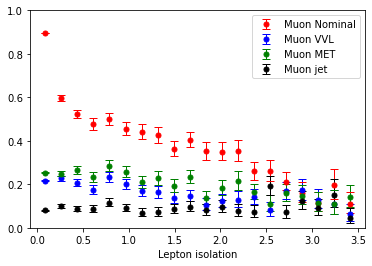

In [78]:
# now we plot trigger efficiency as function of ht
num_nom = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal"}]
num_vvl = hists["jet"][{"region":"numerator","channel":"mu","trigger":"vvl"}]
num_met = hists["jet"][{"region":"numerator","channel":"mu","trigger":"met"}]
num_jet = hists["jet"][{"region":"numerator","channel":"mu","trigger":"jet"}]

den = hists["jet"][{"region":"denominator","channel":"mu","trigger":sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nom/den, 
             yerr=get_yerr(num_nom,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Muon Nominal",         
)
hep.histplot(num_vvl/den, 
             yerr=get_yerr(num_vvl,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Muon VVL",         
)
hep.histplot(num_met/den, 
             yerr=get_yerr(num_met,den),
             ax = ax,
             histtype='errorbar', color='green', capsize=4, elinewidth=1, label="Muon MET",         
)
hep.histplot(num_jet/den, 
             yerr=get_yerr(num_jet,den),
             ax = ax,
             histtype='errorbar', color='black', capsize=4, elinewidth=1, label="Muon jet",         
)

ax.set_ylim(0,1)
ax.legend()
plt.savefig('plots/mu_triggers/lepiso.pdf');

## Plotting distribution

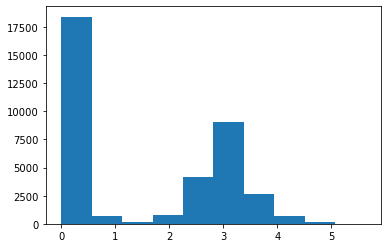

In [28]:
### plotting deltaR distribution
plt.hist(deltaR);

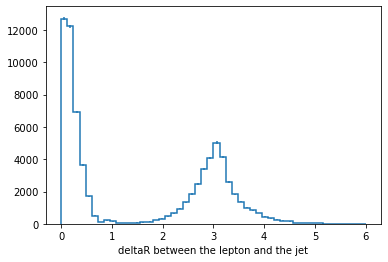

In [29]:
### plotting deltaR distribution
deltaR_axis = hist2.axis.Regular(50,0,6, name='deltaR', label=r'deltaR between the lepton and the jet')

hists = hist2.Hist(
                deltaR_axis,
            )
# now we can fill the histogram with the denominator (baseline selection already applied)
hists.fill(deltaR)
hep.histplot(hists.fill(deltaR));

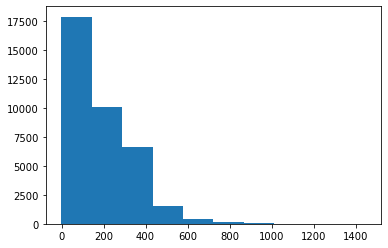

In [30]:
### plotting deltaR distribution
plt.hist(higgspt);

### Making OR

In [80]:
# now we can make histograms for higgspt, jetpt, leptonpt
import hist as hist2
region_cat = hist2.axis.StrCategory(["numerator","denominator"], name="region")
channel_cat = hist2.axis.StrCategory([], name='channel', growth=True)
trigger_cat = hist2.axis.StrCategory([], name='trigger', growth=True)

hpt_axis = hist2.axis.Regular(25, 100, 700, name='higgspt', label=r'matched H $p_T$ [GeV]')
jetpt_axis = hist2.axis.Regular(25, 200, 700, name='jetpt', label=r'Jet $p_T$ [GeV]')
leppt_axis = hist2.axis.Regular(25, 10, 400, name='leppt', label=r'Lepton $p_T$ [GeV]')

hists = {}
hists["jet"] = hist2.Hist(
                channel_cat,
                region_cat,
                trigger_cat,
                hpt_axis,
                jetpt_axis,
                leppt_axis,
            )
# now we can fill the histogram with the denominator (baseline selection already applied)
higgspt = skimmed_events_mu["higgspt"]
jetpt = skimmed_events_mu["fj_pt"]
leppt = skimmed_events_mu["lep_pt"]

hists["jet"].fill(
    channel="mu",
    region="denominator",
    trigger="all",
    higgspt=higgspt,
    jetpt=jetpt,
    leppt=leppt,
)
hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="nominal+vvl",
    higgspt=higgspt[skimmed_events_mu["HLT_munominal"] | skimmed_events_mu["HLT_muvvl"]],
    jetpt=jetpt[skimmed_events_mu["HLT_munominal"] | skimmed_events_mu["HLT_muvvl"]],
    leppt=leppt[skimmed_events_mu["HLT_munominal"] | skimmed_events_mu["HLT_muvvl"]],
)
hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="nominal+vvl+jet",
    higgspt=higgspt[skimmed_events_mu["HLT_munominal"] | skimmed_events_mu["HLT_muvvl"] | skimmed_events_mu["HLT_jet"]],
    jetpt=jetpt[skimmed_events_mu["HLT_munominal"] | skimmed_events_mu["HLT_muvvl"] | skimmed_events_mu["HLT_jet"]],
    leppt=leppt[skimmed_events_mu["HLT_munominal"] | skimmed_events_mu["HLT_muvvl"] | skimmed_events_mu["HLT_jet"]],
)

hists["jet"]

Hist(
  StrCategory(['mu'], growth=True, name='channel', label='channel'),
  StrCategory(['numerator', 'denominator'], name='region', label='region'),
  StrCategory(['all', 'nominal+vvl', 'nominal+vvl+jet'], growth=True, name='trigger', label='trigger'),
  Regular(25, 100, 700, name='higgspt', label='matched H $p_T$ [GeV]'),
  Regular(25, 200, 700, name='jetpt', label='Jet $p_T$ [GeV]'),
  Regular(25, 10, 400, name='leppt', label='Lepton $p_T$ [GeV]'),
  storage=Double()) # Sum: 51691.0 (99295.0 with flow)

/tmp/ipykernel_121/2139677317.py:11: RuntimeWarning: invalid value encountered in true_divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())
/tmp/ipykernel_121/2139677317.py:11: RuntimeWarning: invalid value encountered in true_divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())


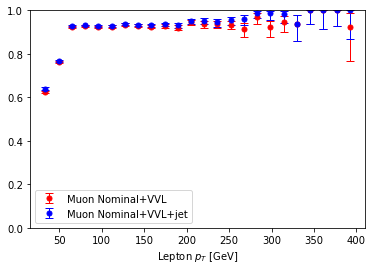

In [81]:
# now we plot trigger efficiency as function of leptonpt
num_nomvvl = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal+vvl", 'jetpt':sum, 'higgspt':sum}]
num_most = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal+vvl+jet", 'jetpt':sum, 'higgspt':sum}]

den = hists["jet"][{"region":"denominator","channel":"mu","trigger":sum, 'jetpt':sum, 'higgspt':sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nomvvl/den, 
             yerr=get_yerr(num_nomvvl,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Muon Nominal+VVL",         
)
hep.histplot(num_most/den, 
             yerr=get_yerr(num_most,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Muon Nominal+VVL+jet",         
)
ax.set_ylim(0,1)
ax.legend()
plt.savefig('plots/mu_triggers/most/leppt.pdf');

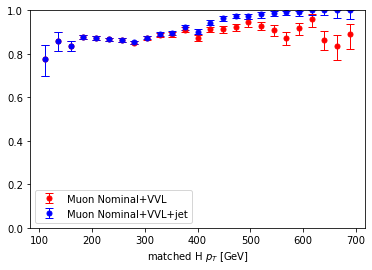

In [83]:
# now we plot trigger efficiency as function of higgspt
num_nomvvl = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal+vvl", 'leppt':sum, 'jetpt':sum}]
num_most = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal+vvl+jet", 'leppt':sum, 'jetpt':sum}]

den = hists["jet"][{"region":"denominator","channel":"mu","trigger":sum, 'leppt':sum, 'jetpt':sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nomvvl/den, 
             yerr=get_yerr(num_nomvvl,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Muon Nominal+VVL",         
)
hep.histplot(num_most/den, 
             yerr=get_yerr(num_most,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Muon Nominal+VVL+jet",         
)
ax.set_ylim(0,1)
ax.legend()
plt.savefig('plots/mu_triggers/most/higgspt.pdf');

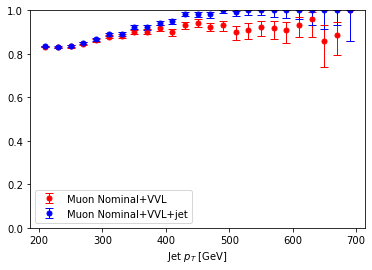

In [84]:
# now we plot trigger efficiency as function of jetpt
num_nomvvl = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal+vvl", 'higgspt':sum, 'leppt':sum}]
num_most = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal+vvl+jet", 'higgspt':sum, 'leppt':sum}]

den = hists["jet"][{"region":"denominator","channel":"mu","trigger":sum, 'higgspt':sum, 'leppt':sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nomvvl/den, 
             yerr=get_yerr(num_nomvvl,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Muon Nominal+VVL",         
)
hep.histplot(num_most/den, 
             yerr=get_yerr(num_most,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Muon Nominal+VVL+jet",         
)
ax.set_ylim(0,1)
ax.legend()
plt.savefig('plots/mu_triggers/most/jetpt.pdf');

In [86]:
# now we can make histograms for deltaR and HT
import hist as hist2
region_cat = hist2.axis.StrCategory(["numerator","denominator"], name="region")
channel_cat = hist2.axis.StrCategory([], name='channel', growth=True)
trigger_cat = hist2.axis.StrCategory([], name='trigger', growth=True)

deltaR_axis = hist2.axis.Regular(20, 0, 1.5, name='deltaR', label=r'deltaR')
ht_axis = hist2.axis.Regular(20,180, 1500, name='ht', label=r'HT [GeV]')
lepiso_axis = hist2.axis.Regular(20, 0, 3.5, name='lepiso', label=r'Lepton isolation')

hists = {}
hists["jet"] = hist2.Hist(
                channel_cat,
                region_cat,
                trigger_cat,
                deltaR_axis,
                ht_axis,
                lepiso_axis
            )
# now we can fill the histogram with the denominator (baseline selection already applied)
deltaR = skimmed_events_mu["fj_lep_dR"]
ht = skimmed_events_mu["ht"]
lepiso = skimmed_events_mu["lep_isolation"]

hists["jet"].fill(
    channel="mu",
    region="denominator",
    trigger="all",
    deltaR=deltaR,
    ht=ht,
    lepiso=lepiso
)
hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="nominal+vvl",
    deltaR=deltaR[skimmed_events_mu["HLT_munominal"] | skimmed_events_mu["HLT_muvvl"]],
    ht=ht[skimmed_events_mu["HLT_munominal"] | skimmed_events_mu["HLT_muvvl"]],
    lepiso=lepiso[skimmed_events_mu["HLT_munominal"] | skimmed_events_mu["HLT_muvvl"]],
)
hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="nominal+vvl+jet",
    deltaR=deltaR[skimmed_events_mu["HLT_munominal"] | skimmed_events_mu["HLT_muvvl"] | skimmed_events_mu["HLT_jet"]],
    ht=ht[skimmed_events_mu["HLT_munominal"] | skimmed_events_mu["HLT_muvvl"] | skimmed_events_mu["HLT_jet"]],
    lepiso=lepiso[skimmed_events_mu["HLT_munominal"] | skimmed_events_mu["HLT_muvvl"] | skimmed_events_mu["HLT_jet"]],
)

hists["jet"].fill(
    channel="mu",
    region="numerator",
    trigger="nominal+vvl+jet+photon",
    deltaR=deltaR[skimmed_events_mu["HLT_munominal"] | skimmed_events_mu["HLT_muvvl"] | skimmed_events_mu["HLT_jet"]],
    ht=ht[skimmed_events_mu["HLT_munominal"] | skimmed_events_mu["HLT_muvvl"] | skimmed_events_mu["HLT_jet"]],
    lepiso=lepiso[skimmed_events_mu["HLT_munominal"] | skimmed_events_mu["HLT_muvvl"] | skimmed_events_mu["HLT_jet"]],
)

hists["jet"]

Hist(
  StrCategory(['mu'], growth=True, name='channel', label='channel'),
  StrCategory(['numerator', 'denominator'], name='region', label='region'),
  StrCategory(['all', 'nominal+vvl', 'nominal+vvl+jet', 'nominal+vvl+jet+photon'], growth=True, name='trigger', label='trigger'),
  Regular(20, 0, 1.5, name='deltaR', label='deltaR'),
  Regular(20, 180, 1500, name='ht', label='HT [GeV]'),
  Regular(20, 0, 3.5, name='lepiso', label='Lepton isolation'),
  storage=Double()) # Sum: 68543.0 (130718.0 with flow)

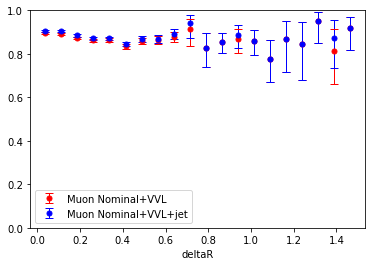

In [89]:
# now we plot trigger efficiency as function of deltaR
num_nomvvl = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal+vvl", 'ht':sum, 'lepiso':sum}]
num_most = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal+vvl+jet", 'ht':sum, 'lepiso':sum}]

den = hists["jet"][{"region":"denominator","channel":"mu","trigger":sum, 'ht':sum, 'lepiso':sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nomvvl/den, 
             yerr=get_yerr(num_nomvvl,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Muon Nominal+VVL",         
)
hep.histplot(num_most/den, 
             yerr=get_yerr(num_most,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Muon Nominal+VVL+jet",         
)
ax.set_ylim(0,1)
ax.set_ylim(0,1)
ax.legend()
plt.savefig('plots/mu_triggers/most/deltaR.pdf');

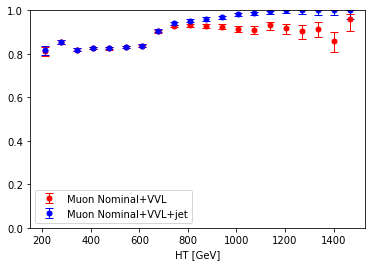

In [90]:
# now we plot trigger efficiency as function of ht
num_nomvvl = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal+vvl", 'deltaR':sum, 'lepiso':sum}]
num_most = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal+vvl+jet", 'deltaR':sum, 'lepiso':sum}]

den = hists["jet"][{"region":"denominator","channel":"mu","trigger":sum, 'deltaR':sum, 'lepiso':sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nomvvl/den, 
             yerr=get_yerr(num_nomvvl,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Muon Nominal+VVL",         
)
hep.histplot(num_most/den, 
             yerr=get_yerr(num_most,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Muon Nominal+VVL+jet",         
)
ax.set_ylim(0,1)
ax.legend()
plt.savefig('plots/mu_triggers/most/ht.pdf');

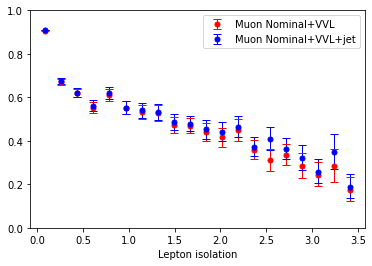

In [91]:
# now we plot trigger efficiency as function of lepiso
num_nomvvl = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal+vvl", 'deltaR':sum, 'ht':sum}]
num_most = hists["jet"][{"region":"numerator","channel":"mu","trigger":"nominal+vvl+jet", 'deltaR':sum, 'ht':sum}]

den = hists["jet"][{"region":"denominator","channel":"mu","trigger":sum, 'deltaR':sum, 'ht':sum}]

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

fig, ax = plt.subplots(1, 1)
hep.histplot(num_nomvvl/den, 
             yerr=get_yerr(num_nomvvl,den),
             ax = ax,
             histtype='errorbar', color='red', capsize=4, elinewidth=1, label="Muon Nominal+VVL",         
)
hep.histplot(num_most/den, 
             yerr=get_yerr(num_most,den),
             ax = ax,
             histtype='errorbar', color='blue', capsize=4, elinewidth=1, label="Muon Nominal+VVL+jet",         
)
ax.set_ylim(0,1)
ax.legend()
plt.savefig('plots/mu_triggers/most/lepiso.pdf');